In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
focal_brands = ['Sephora',
 'ULTA Beauty',
 'Olive Garden',
 'The Cheesecake Factory',
 'Target',
 'Walmart',
 'Anthropologie',
 "Victoria's Secret"]

In [3]:
brand = focal_brands[0]
focal_brand_path = os.path.join('../part2_r_statistics', brand)
focal_brand_path

'../part2_r_statistics/Sephora'

In [4]:
file_list = os.listdir(focal_brand_path)
result_file_list = [file for file in file_list if file.find('_result') != -1]

In [5]:
result_df = pd.DataFrame()

for result_file in result_file_list:
    result_file_path = os.path.join(focal_brand_path, result_file)
    tmp_res_df = pd.read_csv(result_file_path, skiprows=1, float_precision="round_trip")
    # Removing all the records for ols and m_olsExp
    if 'filename' in tmp_res_df['filename'].tolist(): #Wrong input
        continue
    result_df = pd.concat([result_df, tmp_res_df], ignore_index=True)

In [6]:
result_df = result_df[~result_df['type'].isin(['ols', 'm_olsExp'])].reset_index(drop=True)
result_df = result_df.replace('FALSE', False).replace('False', False)
# result_df.iloc[:,3:] = result_df.iloc[:,3:].astype('float64', copy=True)

In [7]:
result_df

,tmp,filename,type,X_Estimate,X_Std. Error,X_t value,X_Pr(>|t|),IV_firststage_reviews_tw_Estimate,IV_firststage_reviews_tw_Std. Error,IV_firststage_reviews_tw_t value,...,HausWutest_Df,HausWutest_F,HausWutest_Pr(>F),Sargan_result_rsq,Sargan_result_adjrsq,Sargan_pvalue_rsq,Sargan_pvalue_adjrsq,num_sig_variables,Y_r.squared,Y_adj.r.squared
0,tmp,Brooks Brothers,fe_reviews_reviews,0.069505,0.019034,3.651686,2.663556e-04,-0.000100211019005055,0.000190635514929389,-0.52566815287368,...,-1,2.34354613255589,0.125940823615684,4.23449349278573,-353.500987164209,0.120362561387644,1,2,0.671032,0.625286
1,tmp,Brooks Brothers,fe_reviews_visits,0.068299,0.003906,17.487215,2.233359e-64,False,False,False,...,-1,1.9329373522152,0.164572372068733,1.21490380085773e-28,-355.731304347826,1,1,1,0.671424,0.625732
2,tmp,Brooks Brothers,fe_exp_reviews_reviews,1.541672,0.234746,6.567409,6.312742e-11,0.377923078481934,0.318135845031044,1.18792988713691,...,-1,14.7189627428136,0.000128155117934805,0.74492433429816,-357.468891520661,0.689035719250415,1,2,0.727018,0.689058
3,tmp,Brooks Brothers,fe_exp_reviews_visits,1.064166,0.030081,35.376507,3.701041e-219,False,False,False,...,-1,37.0578552273081,1.34043757762807e-09,2.74781634341386e-28,-355.731304347826,1,1,1,0.735753,0.699007
4,tmp,Torrid,fe_reviews_reviews,0.060262,0.021028,2.865750,4.187351e-03,0.00498750665721031,0.00258175309132841,1.93182945106654,...,-1,14.496389999924,0.000143060081773808,3.21982428292259,-346.092335329809,0.199905176680324,1,0,0.109297,0.019754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,tmp,REI,fe_exp_reviews_visits,17.982587,11.619486,1.547623,1.218157e-01,False,False,False,...,-1,159.888003382137,9.11891570094413e-36,3.13423717663725e-28,-347.234455958549,1,1,0,0.011222,-0.091762
1476,tmp,B,fe_reviews_reviews,1.637189,1.288917,1.270205,2.041267e-01,-0.000207663876637634,0.000482982056227962,-0.429961887734437,...,-1,4.07898337207887,0.0435235342635979,9.96297734472914,-343.774750838493,0.00686383694371739,1,1,0.044036,-0.075134
1477,tmp,B,fe_reviews_visits,4.949395,1.881332,2.630792,8.569535e-03,False,False,False,...,-1,1470.55007618526,9.57750888570686e-255,1.75098878080951e-28,-352.441507967353,1,1,1,0.036950,-0.083103
1478,tmp,B,fe_exp_reviews_reviews,-1.193309,3.944105,-0.302555,7.622535e-01,-0.00426440753458848,0.00068360771342525,-6.23809159967119,...,-1,0.309792452704997,0.577856108473467,2.8353034355311,-351.778482684411,0.242282296608164,1,3,0.007549,-0.116170


In [8]:
sum(result_df['filename'].value_counts() == 1)

0

In [9]:
sum(result_df['filename'].value_counts() == 2)

7

In [10]:
sum(result_df['filename'].value_counts() == 3)

6

In [11]:
sum(result_df['filename'].value_counts() == 4)

362

In [12]:
count_list = result_df['filename'].value_counts()
valid_brands = count_list[count_list == 4].index.to_list() # having the values of all the four models
len(valid_brands)

362

In [13]:
result_df = result_df[result_df['filename'].isin(valid_brands)]

### Making the Figure D1 and D2

1. We only need to select the brands whose p-value for all the models are significant (<0.05) i.e., X_Pr(>|t|)
2. Then we need to plot their X_Estimate for each of the four models
3. Then we need to put stars at the neighboring brands as per the p-value for each model \
-> *** means p_value <= 0.01 \
-> ** means 0.01 < p_value <= 0.05 \
-> * means 0.05 < p_value <= 0.1

In [14]:
coeff_est_df = result_df[['filename', 'type', 'X_Estimate', 'X_Std. Error', 'X_Pr(>|t|)']]
coeff_est_df

,filename,type,X_Estimate,X_Std. Error,X_Pr(>|t|)
0,Brooks Brothers,fe_reviews_reviews,0.069505,0.019034,2.663556e-04
1,Brooks Brothers,fe_reviews_visits,0.068299,0.003906,2.233359e-64
2,Brooks Brothers,fe_exp_reviews_reviews,1.541672,0.234746,6.312742e-11
3,Brooks Brothers,fe_exp_reviews_visits,1.064166,0.030081,3.701041e-219
4,Torrid,fe_reviews_reviews,0.060262,0.021028,4.187351e-03
...,...,...,...,...,...
1475,REI,fe_exp_reviews_visits,17.982587,11.619486,1.218157e-01
1476,B,fe_reviews_reviews,1.637189,1.288917,2.041267e-01
1477,B,fe_reviews_visits,4.949395,1.881332,8.569535e-03
1478,B,fe_exp_reviews_reviews,-1.193309,3.944105,7.622535e-01


In [15]:
def filter_brands_pvalue(brand_pvalue):
    pvalues = brand_pvalue.values
    
    if (pvalues[0] < 0.05) and (pvalues[1] < 0.05) and (pvalues[2] < 0.05) and (pvalues[3] < 0.05):
        return True
    else:
        return False

In [16]:
filtered_brands = coeff_est_df.groupby('filename')['X_Pr(>|t|)'].apply(filter_brands_pvalue)
filtered_brands_list = filtered_brands [filtered_brands == True].index.to_list()

In [23]:
def get_pvalue_stars(p_value):
    if p_value <= 0.01:
        return '***'
    elif 0.01 < p_value <= 0.05:
        return '**'
    elif 0.05 < p_value <= 0.1:
        return '*'

In [24]:
coeff_est_df_filtered = coeff_est_df[coeff_est_df['filename'].isin(filtered_brands_list)]
coeff_est_df_filtered['pvalue_stars'] = coeff_est_df_filtered['X_Pr(>|t|)'].apply(get_pvalue_stars)
coeff_est_df_filtered

/tmp/ipykernel_3179166/2757130214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coeff_est_df_filtered['pvalue_stars'] = coeff_est_df_filtered['X_Pr(>|t|)'].apply(get_pvalue_stars)


,filename,type,X_Estimate,X_Std. Error,X_Pr(>|t|),pvalue_stars
0,Brooks Brothers,fe_reviews_reviews,0.069505,0.019034,2.663556e-04,***
1,Brooks Brothers,fe_reviews_visits,0.068299,0.003906,2.233359e-64,***
2,Brooks Brothers,fe_exp_reviews_reviews,1.541672,0.234746,6.312742e-11,***
3,Brooks Brothers,fe_exp_reviews_visits,1.064166,0.030081,3.701041e-219,***
24,Zumiez,fe_reviews_reviews,0.018076,0.001061,2.863665e-62,***
...,...,...,...,...,...,...
1416,Chico's,fe_exp_reviews_visits,58.659072,5.020167,1.993477e-30,***
1424,Primark,fe_reviews_reviews,0.001242,0.000252,8.585015e-07,***
1425,Primark,fe_reviews_visits,0.001026,0.000248,3.567462e-05,***
1426,Primark,fe_exp_reviews_reviews,0.066622,0.030675,2.996274e-02,**


In [25]:
lin_reviews = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_reviews_reviews'].sort_values('X_Estimate', ascending=False)
lin_visits = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_reviews_visits'].sort_values('X_Estimate', ascending=False)
exp_reviews = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_exp_reviews_reviews'].sort_values('X_Estimate', ascending=False)
exp_visits = coeff_est_df_filtered[coeff_est_df_filtered['type'] == 'fe_exp_reviews_visits'].sort_values('X_Estimate', ascending=False)

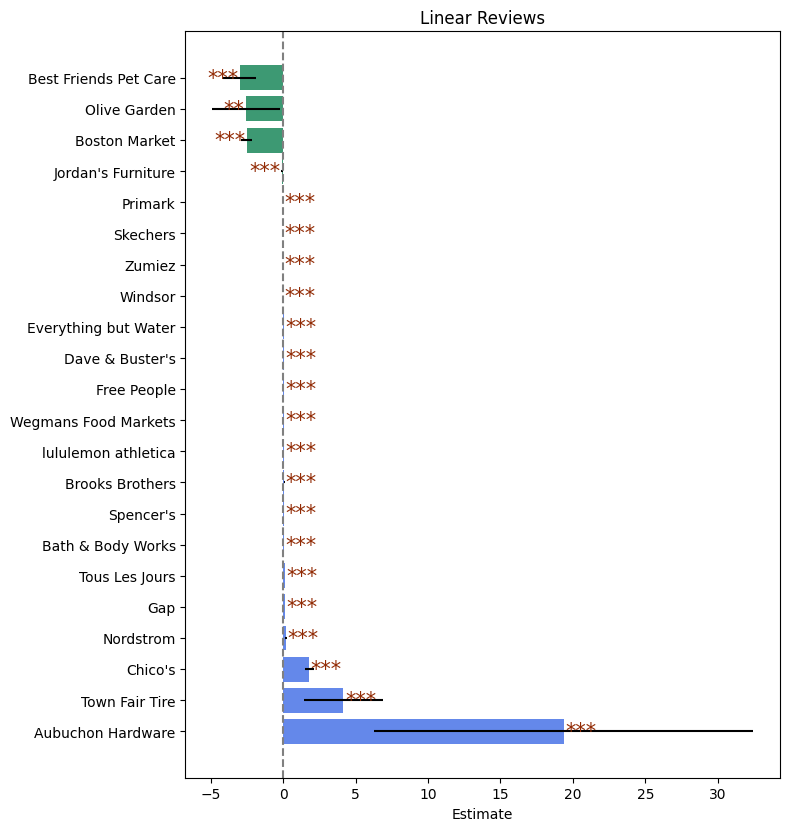

In [ ]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
lin_reviews['Lower Bound'] = lin_reviews['X_Estimate'] - 1.96 * lin_reviews['X_Std. Error']
lin_reviews['Upper Bound'] = lin_reviews['X_Estimate'] + 1.96 * lin_reviews['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in lin_reviews.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Linear Reviews')

# Show the plot
plt.show()

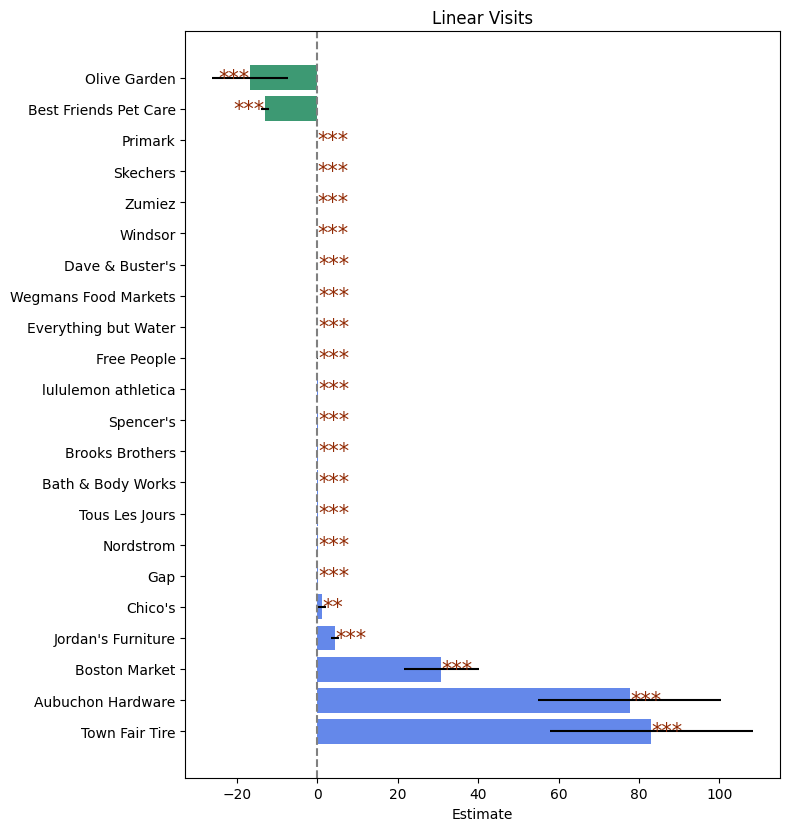

In [30]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
lin_visits['Lower Bound'] = lin_visits['X_Estimate'] - 1.96 * lin_visits['X_Std. Error']
lin_visits['Upper Bound'] = lin_visits['X_Estimate'] + 1.96 * lin_visits['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in lin_visits.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Linear Visits')

# Show the plot
plt.show()

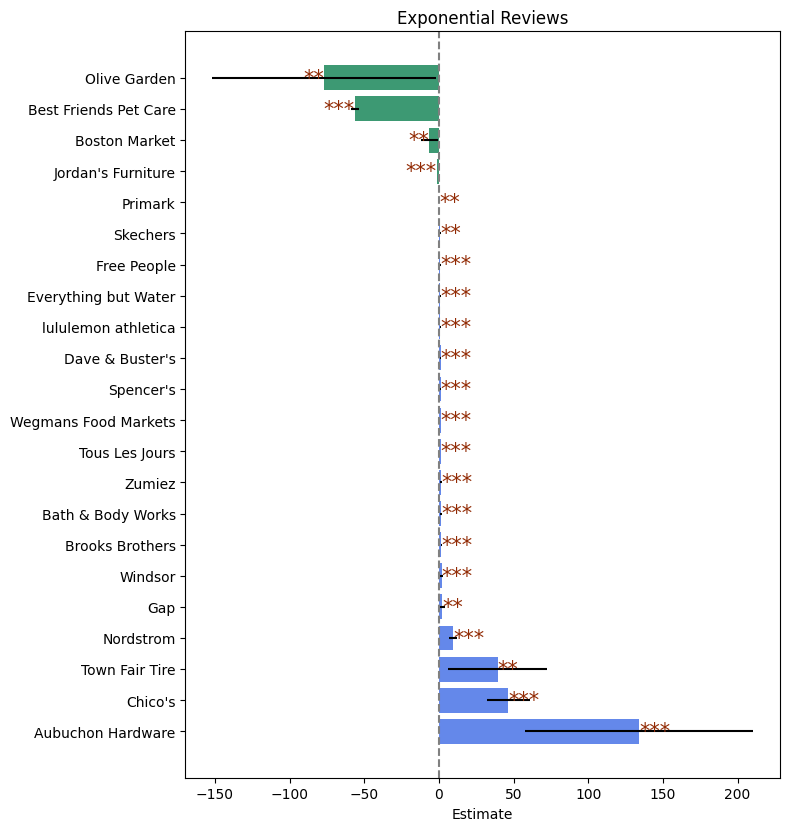

In [31]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
exp_reviews['Lower Bound'] = exp_reviews['X_Estimate'] - 1.96 * exp_reviews['X_Std. Error']
exp_reviews['Upper Bound'] = exp_reviews['X_Estimate'] + 1.96 * exp_reviews['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in exp_reviews.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Exponential Reviews')

# Show the plot
plt.show()

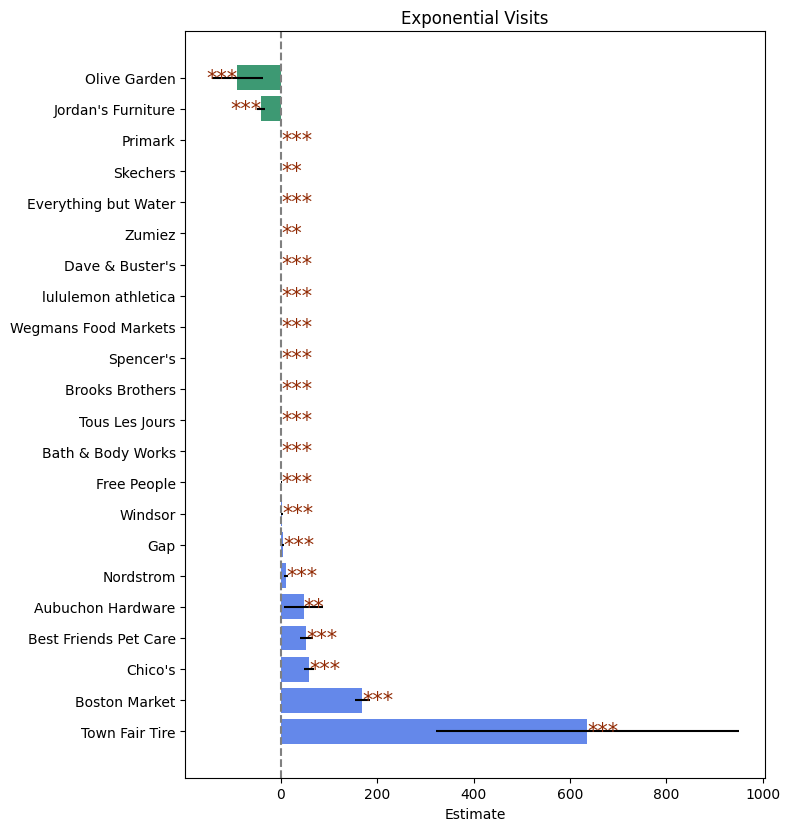

In [32]:
custom_colors = {
    'positive': '#6488ea',  # Blue for positive estimates
    'star': '#922b05',  # Red for negative estimates
    'negative': '#3d9973'       # Prettier yellow for stars
}

confidence_level = 0.95
exp_visits['Lower Bound'] = exp_visits['X_Estimate'] - 1.96 * exp_visits['X_Std. Error']
exp_visits['Upper Bound'] = exp_visits['X_Estimate'] + 1.96 * exp_visits['X_Std. Error']

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Add a constant offset for stars
star_offset = 0.1
    
# Set the font size for the stars
star_fontsize = 15

# Plotting estimates and confidence intervals for each business
for idx, row in exp_visits.iterrows():
    biz_biz = row['filename']
    estimate = row['X_Estimate']
    std_error = row['X_Std. Error']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']

    # Determine the color based on the sign of the estimate
    color = custom_colors['positive'] if estimate >= 0 else custom_colors['negative']

    # Plotting the bars with different colors for positive and negative estimates
    ax.barh(biz_biz, estimate, xerr=[[estimate - lower_bound], [upper_bound - estimate]], color=color)

    # Add stars based on the number of *s in the "coefficients" column with an offset
    stars = row['pvalue_stars'].count('*')
    if stars > 0:
        # Set the alignment for negative estimates
        ha = 'left' if estimate >= 0 else 'right'
        ax.text(estimate + star_offset if estimate >= 0 else estimate - star_offset, biz_biz, '*' * stars, va='center', ha=ha, color=custom_colors['star'], fontsize=star_fontsize)

plt.axvline(x=0, linestyle='--', color='gray')  # Plotting a dashed line for the estimate

plt.tight_layout()

# Add labels and title
ax.set_xlabel('Estimate')
ax.set_title('Exponential Visits')

# Show the plot
plt.show()